In [1]:
import pandas as pd
import numpy as np

import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposition
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
elec_cons = pd.read_csv('D:/python/Machine Learning/Modelling case studies/forecasting electricity consumption/Electricity Consumption.csv')

In [3]:
elec_cons.shape

(561, 2)

In [4]:
elec_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [5]:
elec_cons.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [6]:
elec_cons['DATE'] = pd.to_datetime(elec_cons.DATE , format= "%m/%d/%Y")

In [7]:
elec_cons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [8]:
elec_cons['mon'] = elec_cons.DATE.dt.month
elec_cons['year'] = elec_cons.DATE.dt.year

In [9]:
elec_cons_r = elec_cons.set_index(elec_cons.DATE , drop=True)

In [10]:
elec_cons_r.drop(columns=['DATE'], axis=1, inplace=True)

In [11]:
elec_cons_r.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 561 entries, 1973-01-01 to 2019-09-01
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Electricty_Consumption_in_TW  561 non-null    float64
 1   mon                           561 non-null    int64  
 2   year                          561 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 17.5 KB


<AxesSubplot:xlabel='DATE'>

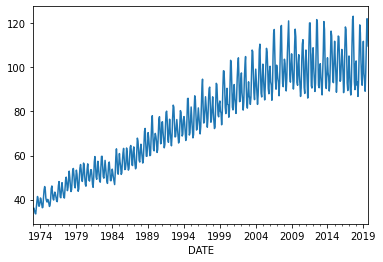

In [12]:
elec_cons_r.Electricty_Consumption_in_TW.plot()

<AxesSubplot:xlabel='mon'>

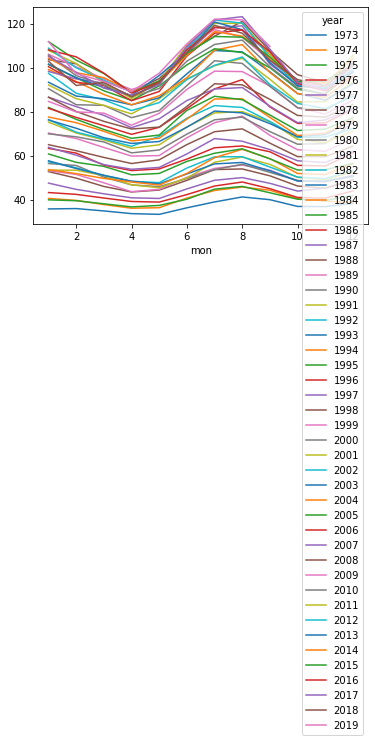

In [13]:
pd.pivot_table(data=elec_cons_r, index='mon', columns='year', values='Electricty_Consumption_in_TW').plot()

<AxesSubplot:xlabel='year'>

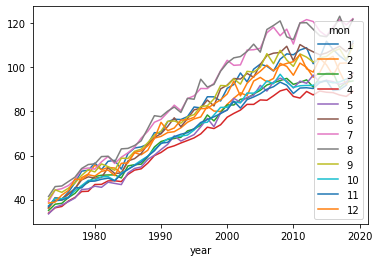

In [14]:
pd.pivot_table(data=elec_cons_r, index='year', columns='mon', values='Electricty_Consumption_in_TW').plot()

In [15]:
decompose = seasonal_decompose(elec_cons_r.Electricty_Consumption_in_TW, model='multiplicative', two_sided=False, extrapolate_trend=4)

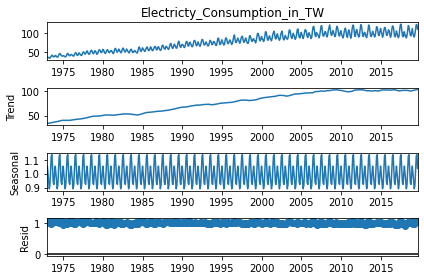

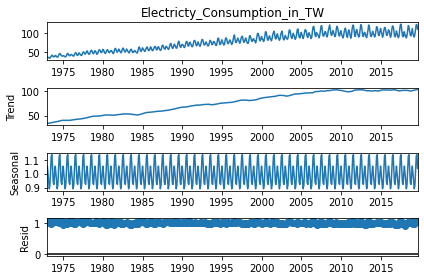

In [16]:
decompose.plot()

In [17]:
decompose_data = pd.concat([decompose.trend, decompose.seasonal, decompose.resid, decompose.observed],axis=1)
decompose_data.columns = ['Trend', 'SI', "Irregular", "Actual"]

In [18]:
decompose_data

,Trend,SI,Irregular,Actual
DATE,,,,
1973-01-01,34.092018,1.054397,1.000731,35.9728
1973-02-01,34.357224,0.996618,1.055266,36.1334
1973-03-01,34.622430,0.946374,1.070096,35.0625
1973-04-01,34.887636,0.891631,1.087913,33.8416
1973-05-01,35.152842,0.919530,1.036710,33.5107
...,...,...,...,...
2019-05-01,101.805712,0.919530,1.042437,97.5860
2019-06-01,102.143504,1.030825,1.052862,110.8580
2019-07-01,102.417300,1.126577,1.058246,122.1014


In [19]:
import statsmodels.tsa.seasonal as stl

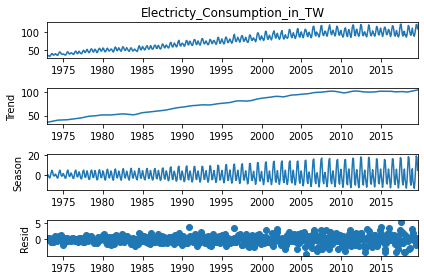

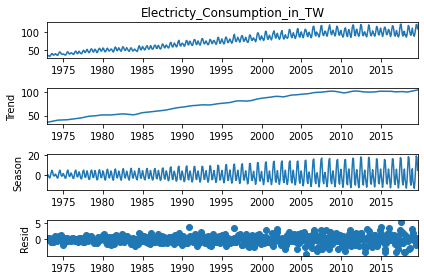

In [20]:
model = stl.STL(elec_cons_r.Electricty_Consumption_in_TW).fit()
model.plot()

In [21]:
ts = elec_cons_r.Electricty_Consumption_in_TW
ts

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

In [22]:
train = ts[:'2019-04-01']
test = ts['2019-05-01':]

In [23]:
# the main library has a small set of functionality
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

In [24]:
decomp = decompose(train, period=12)
decomp

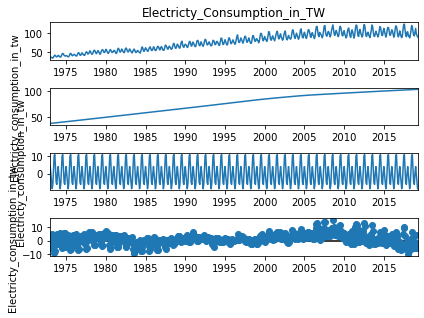

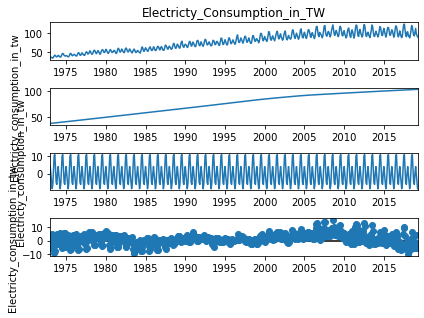

In [25]:
decomp.plot()

In [26]:
fcast1 = forecast(decomp, steps=5, fc_func=drift, seasonal=True)

fcast1.head()

,drift+seasonal
2019-05-02,97.658307
2019-06-02,106.563540
2019-07-03,114.040817
2019-08-03,114.656972
2019-09-03,106.770728


In [27]:
test.shape

(5,)

In [28]:
np.mean(np.abs(fcast1['drift+seasonal'].values - test.values)/test.values)

0.038165966566406063

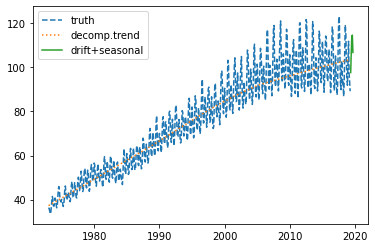

In [29]:
plt.plot(train, '--', label='truth')
plt.plot(decomp.trend, ':', label='decomp.trend')
plt.plot(fcast1, '-', label=fcast1.columns[0])

plt.legend();

DATE
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64


<AxesSubplot:xlabel='DATE'>

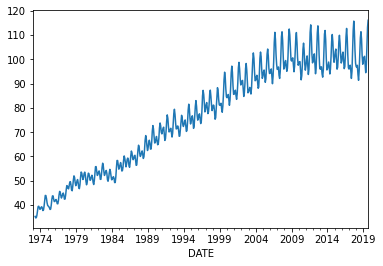

In [30]:
#Moving Average
print(ts)
ts.rolling(window=4).mean().plot()

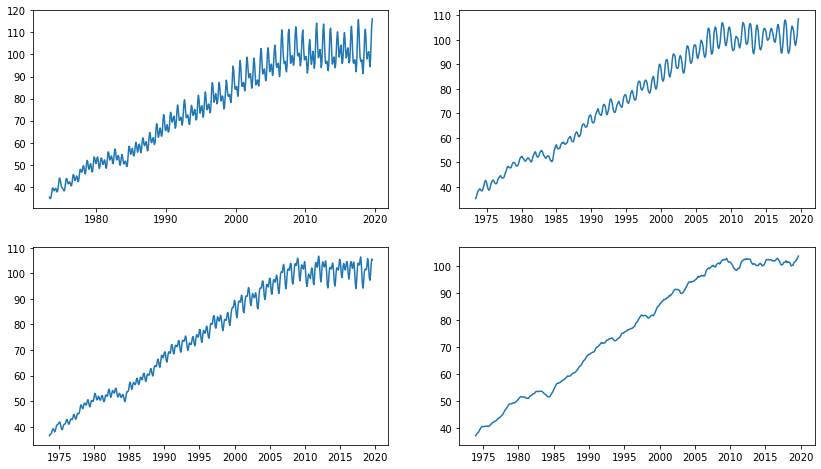

In [31]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(ts.index, ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][1].plot(ts.index, ts.rolling(window=6).mean(), label='4-Months Rolling Mean')
axes[1][0].plot(ts.index, ts.rolling(window=8).mean(), label='4-Months Rolling Mean')
axes[1][1].plot(ts.index, ts.rolling(window=12).mean(), label='4-Months Rolling Mean')

In [32]:
### single exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [33]:
# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

In [34]:
# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [35]:
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

<ipython-input-35-1f90718b376f>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [36]:
ets_fit.forecast(steps=6)

2019-05-01     93.212251
2019-06-01    105.052041
2019-07-01    114.576226
2019-08-01    114.704091
2019-09-01    103.579248
2019-10-01     92.856208
Freq: MS, dtype: float64

In [37]:
print('MAPE_test', np.mean(np.abs(test-ets_fit.forecast(steps=6))/test))

MAPE_test 0.05457174705712533


In [38]:
alpha = np.linspace(0,1,5);
beta = np.linspace(0,1,5);
gamma = np.linspace(0,1,5)

best_params = []

for a in alpha:
    for b in beta:
        for g in gamma:
            print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})
            model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)
            model = model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
            fcast = model.forecast(steps=6)
            score = np.mean(np.abs(test - fcast)/test)
            print('MAPE for :', (a,b,g), np.mean(np.abs(test - fcast)/test))
            
            best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mape': score})

Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.0}
MAPE for : (0.0, 0.0, 0.0) 21.24049040680189
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-38-f9c6373c73b3>:12: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model = model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.0, 0.0, 0.25) 0.45212235766305786
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.0, 0.0, 0.5) 0.007943528970932454
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.75}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


 (0.0, 0.0, 0.75) 0.08888714600793146
Checking for {'alpha': 0.0, 'beta': 0.0, 'gamma': 1.0}
MAPE for : (0.0, 0.0, 1.0) 0.04820913121943008
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.0}
MAPE for : (0.0, 0.25, 0.0) 21.24049040680189
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency inform

MAPE for : (0.0, 0.25, 0.25) 0.45212235766305786
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.5}
MAPE for : (0.0, 0.25, 0.5) 0.007943538531655794
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.75}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


 (0.0, 0.25, 0.75) 0.08888714600793146
Checking for {'alpha': 0.0, 'beta': 0.25, 'gamma': 1.0}
MAPE for : (0.0, 0.25, 1.0) 0.04820913121943008
Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.0, 0.5, 0.0) 21.24049040680189
Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.0, 0.5, 0.25) 0.45212235766305786
Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.0, 0.5, 0.5) 0.007943533651324575
Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.75}
MAPE for : (0.0, 0.5, 0.75) 0.08888714600793146
Checking for {'alpha': 0.0, 'beta': 0.5, 'gamma': 1.0}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


 (0.0, 0.5, 1.0) 0.04820913121943008
Checking for {'alpha': 0.0, 'beta': 0.75, 'gamma': 0.0}
MAPE for : (0.0, 0.75, 0.0) 21.24049040680189
Checking for {'alpha': 0.0, 'beta': 0.75, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency inform

MAPE for : (0.0, 0.75, 0.25) 0.45212235766305786
Checking for {'alpha': 0.0, 'beta': 0.75, 'gamma': 0.5}
MAPE for : (0.0, 0.75, 0.5) 0.007943543072831492
Checking for {'alpha': 0.0, 'beta': 0.75, 'gamma': 0.75}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.0, 0.75, 0.75) 0.08888714600793146
Checking for {'alpha': 0.0, 'beta': 0.75, 'gamma': 1.0}
MAPE for : (0.0, 0.75, 1.0) 0.04820913121943008
Checking for {'alpha': 0.0, 'beta': 1.0, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.0, 1.0, 0.0) 21.24049040680189
Checking for {'alpha': 0.0, 'beta': 1.0, 'gamma': 0.25}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


 (0.0, 1.0, 0.25) 0.45212235766305786
Checking for {'alpha': 0.0, 'beta': 1.0, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.0, 1.0, 0.5) 0.007943519338203784
Checking for {'alpha': 0.0, 'beta': 1.0, 'gamma': 0.75}
MAPE for : (0.0, 1.0, 0.75) 0.08888714600793146

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



Checking for {'alpha': 0.0, 'beta': 1.0, 'gamma': 1.0}
MAPE for : (0.0, 1.0, 1.0) 0.04820913121943008
Checking for {'alpha': 0.25, 'beta': 0.0, 'gamma': 0.0}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


 (0.25, 0.0, 0.0) 0.010214531898571091
Checking for {'alpha': 0.25, 'beta': 0.0, 'gamma': 0.25}
MAPE for : (0.25, 0.0, 0.25) 0.017019755419707582
Checking for {'alpha': 0.25, 'beta': 0.0, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.0, 0.5) 0.022089487435546364
Checking for {'alpha': 0.25, 'beta': 0.0, 'gamma': 0.75}
MAPE for : (0.25, 0.0, 0.75) 0.031986637086960916
Checking for {'alpha': 0.25, 'beta': 0.0, 'gamma': 1.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.0, 1.0) 0.04827994744557323
Checking for {'alpha': 0.25, 'beta': 0.25, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.25, 0.0) 0.04386791733292389
Checking for {'alpha': 0.25, 'beta': 0.25, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.25, 0.25) 0.00846478865108563
Checking for {'alpha': 0.25, 'beta': 0.25, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.25, 0.5) 0.013946200449016542
Checking for {'alpha': 0.25, 'beta': 0.25, 'gamma': 0.75}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.25, 0.75) 0.0776808001196428
Checking for {'alpha': 0.25, 'beta': 0.25, 'gamma': 1.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.25, 1.0) 0.24421733295441744
Checking for {'alpha': 0.25, 'beta': 0.5, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.5, 0.0) 0.054283908159585594
Checking for {'alpha': 0.25, 'beta': 0.5, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.5, 0.25) 0.028048618609357208
Checking for {'alpha': 0.25, 'beta': 0.5, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.5, 0.5) 0.08537469897753838
Checking for {'alpha': 0.25, 'beta': 0.5, 'gamma': 0.75}
MAPE for : (0.25, 0.5, 0.75) 1.3473625015256434
Checking for {'alpha': 0.25, 'beta': 0.5, 'gamma': 1.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.25, 0.5, 1.0) 72.21750763709159
Checking for {'alpha': 0.25, 'beta': 0.75, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.75, 0.0) 0.08488694839442264
Checking for {'alpha': 0.25, 'beta': 0.75, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 0.75, 0.25) 0.071824430997661
Checking for {'alpha': 0.25, 'beta': 0.75, 'gamma': 0.5}
MAPE for : (0.25, 0.75, 0.5) 81.8099429776999
Checking for {'alpha': 0.25, 'beta': 0.75, 'gamma': 0.75}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency inform

MAPE for : (0.25, 0.75, 0.75) 44.430464507253916
Checking for {'alpha': 0.25, 'beta': 0.75, 'gamma': 1.0}
MAPE for : (0.25, 0.75, 1.0) 90.98587627409411
Checking for {'alpha': 0.25, 'beta': 1.0, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.25, 1.0, 0.0) 0.07579714609019186
Checking for {'alpha': 0.25, 'beta': 1.0, 'gamma': 0.25}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


 (0.25, 1.0, 0.25) 65.14685029350467
Checking for {'alpha': 0.25, 'beta': 1.0, 'gamma': 0.5}
MAPE for : (0.25, 1.0, 0.5) 47.832917116273244
Checking for {'alpha': 0.25, 'beta': 1.0, 'gamma': 0.75}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.25, 1.0, 0.75) 48.35420986725669
Checking for {'alpha': 0.25, 'beta': 1.0, 'gamma': 1.0}
MAPE for : (0.25, 1.0, 1.0) 4257.534129450399
Checking for {'alpha': 0.5, 'beta': 0.0, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.5, 0.0, 0.0) 0.04712925955161157
Checking for {'alpha': 0.5, 'beta': 0.0, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.5, 0.0, 0.25) 0.02418792310525227
Checking for {'alpha': 0.5, 'beta': 0.0, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.5, 0.0, 0.5) 0.028735645248491114
Checking for {'alpha': 0.5, 'beta': 0.0, 'gamma': 0.75}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.5, 0.0, 0.75) 0.024993241641651637
Checking for {'alpha': 0.5, 'beta': 0.0, 'gamma': 1.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.5, 0.0, 1.0) 0.032306277205798276
Checking for {'alpha': 0.5, 'beta': 0.25, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.5, 0.25, 0.0) 0.05790583422656794
Checking for {'alpha': 0.5, 'beta': 0.25, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.5, 0.25, 0.25) 0.04377646915288501
Checking for {'alpha': 0.5, 'beta': 0.25, 'gamma': 0.5}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


 (0.5, 0.25, 0.5) 0.05510786275025629
Checking for {'alpha': 0.5, 'beta': 0.25, 'gamma': 0.75}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.5, 0.25, 0.75) 35.77650724535101
Checking for {'alpha': 0.5, 'beta': 0.25, 'gamma': 1.0}
MAPE for : 

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


(0.5, 0.25, 1.0) 7.651734977785369
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.0}
MAPE for : (0.5, 0.5, 0.0) 0.0678972587090734
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.25}
MAPE for : (0.5, 0.5, 0.25) 0.8388958395431538
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.5, 0.5, 0.5) 0.9941749667141057
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 0.75}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.5, 0.5, 0.75) 30737346.60309732
Checking for {'alpha': 0.5, 'beta': 0.5, 'gamma': 1.0}
MAPE for : 

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


(0.5, 0.5, 1.0) 32.35931120164777
Checking for {'alpha': 0.5, 'beta': 0.75, 'gamma': 0.0}
MAPE for : (0.5, 0.75, 0.0) 0.07385947169237538
Checking for {'alpha': 0.5, 'beta': 0.75, 'gamma': 0.25}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


 (0.5, 0.75, 0.25) 6538480.600443614
Checking for {'alpha': 0.5, 'beta': 0.75, 'gamma': 0.5}
MAPE for : (0.5, 0.75, 0.5) 6.301518136697604e+33
Checking for {'alpha': 0.5, 'beta': 0.75, 'gamma': 0.75}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.5, 0.75, 0.75) 1.6763527552145748e+27
Checking for {'alpha': 0.5, 'beta': 0.75, 'gamma': 1.0}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


 (0.5, 0.75, 1.0) 30350.65128934562
Checking for {'alpha': 0.5, 'beta': 1.0, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.5, 1.0, 0.0) 0.086498858160508
Checking for {'alpha': 0.5, 'beta': 1.0, 'gamma': 0.25}
MAPE for : (0.5, 1.0, 0.25) 424948769509903.44
Checking for {'alpha': 0.5, 'beta': 1.0, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency inform

MAPE for : (0.5, 1.0, 0.5) 0.9999626836863114
Checking for {'alpha': 0.5, 'beta': 1.0, 'gamma': 0.75}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1368: RuntimeWarning: overflow encountered in multiply
  alphac * trended(lvls[i - 1], dampen(b[i - 1], phi))
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1374: RuntimeWarning: overflow encountered in multiply
  s[i + m - 1] = y_gamma[i - 1] / trended(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1371: RuntimeWarning: invalid value encountered in true_divide
  b[i] = (beta * detrend(lvls[i], lvls[i - 1])) + (
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1372: RuntimeWarning: invalid value encountered in double_scalars
  betac * dampen(b[i - 1], phi)
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1383:

 (0.5, 1.0, 0.75) nan
Checking for {'alpha': 0.5, 'beta': 1.0, 'gamma': 1.0}
MAPE for : (0.5, 1.0, 1.0) 7347987898.741663
Checking for {'alpha': 0.75, 'beta': 0.0, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.0, 0.0) 0.04867167607072662
Checking for {'alpha': 0.75, 'beta': 0.0, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.0, 0.25) 0.016677631772985847
Checking for {'alpha': 0.75, 'beta': 0.0, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.0, 0.5) 0.03987904739962418
Checking for {'alpha': 0.75, 'beta': 0.0, 'gamma': 0.75}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.0, 0.75) 0.03626482466654563
Checking for {'alpha': 0.75, 'beta': 0.0, 'gamma': 1.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.0, 1.0) 0.033926983799818976
Checking for {'alpha': 0.75, 'beta': 0.25, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.25, 0.0) 0.057578585426442175
Checking for {'alpha': 0.75, 'beta': 0.25, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.25, 0.25) 0.016994600234181444
Checking for {'alpha': 0.75, 'beta': 0.25, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.25, 0.5) 0.067497226525475
Checking for {'alpha': 0.75, 'beta': 0.25, 'gamma': 0.75}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


 (0.75, 0.25, 0.75) 116338.35849928805
Checking for {'alpha': 0.75, 'beta': 0.25, 'gamma': 1.0}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


 (0.75, 0.25, 1.0) 3253.2504199172386
Checking for {'alpha': 0.75, 'beta': 0.5, 'gamma': 0.0}
MAPE for : (0.75, 0.5, 0.0) 0.06163466453713928
Checking for {'alpha': 0.75, 'beta': 0.5, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.5, 0.25) 0.02435616627749932
Checking for {'alpha': 0.75, 'beta': 0.5, 'gamma': 0.5}
MAPE for : (0.75, 0.5, 0.5) 0.980532705590939
Checking for {'alpha': 0.75, 'beta': 0.5, 'gamma': 0.75}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.75, 0.5, 0.75) 4.358610443371202e+32
Checking for {'alpha': 0.75, 'beta': 0.5, 'gamma': 1.0}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


 (0.75, 0.5, 1.0) 2897801.076529751
Checking for {'alpha': 0.75, 'beta': 0.75, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.75, 0.0) 0.0563130283363677
Checking for {'alpha': 0.75, 'beta': 0.75, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.75, 0.75, 0.25) 0.058449078639022614
Checking for {'alpha': 0.75, 'beta': 0.75, 'gamma': 0.5}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


 (0.75, 0.75, 0.5) 3.355852933195253e+51
Checking for {'alpha': 0.75, 'beta': 0.75, 'gamma': 0.75}
MAPE for : (0.75, 0.75, 0.75) 0.8674271798318136
Checking for {'alpha': 0.75, 'beta': 0.75, 'gamma': 1.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (0.75, 0.75, 1.0) 2131112930.9109588
Checking for {'alpha': 0.75, 'beta': 1.0, 'gamma': 0.0}
MAPE for : (0.75, 1.0, 0.0) 0.036085940558431104
Checking for {'alpha': 0.75, 'beta': 1.0, 'gamma': 0.25}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


 (0.75, 1.0, 0.25) 176.93667696351116
Checking for {'alpha': 0.75, 'beta': 1.0, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (0.75, 1.0, 0.5) 9.694939395611664
Checking for {'alpha': 0.75, 'beta': 1.0, 'gamma': 0.75}
MAPE for : (0.75, 1.0, 0.75) 1.8889969495457967e+268
Checking for {'alpha': 0.75, 'beta': 1.0, 'gamma': 1.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1436: RuntimeWarning: overflow encountered in matmul
  sse = err.T @ err
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920

MAPE for : (0.75, 1.0, 1.0) 1.1024859613554366e+33
Checking for {'alpha': 1.0, 'beta': 0.0, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 0.0, 0.0) 0.04695842530355886
Checking for {'alpha': 1.0, 'beta': 0.0, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 0.0, 0.25) 0.012054139203758332
Checking for {'alpha': 1.0, 'beta': 0.0, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 0.0, 0.5) 0.020316708832318307
Checking for {'alpha': 1.0, 'beta': 0.0, 'gamma': 0.75}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 0.0, 0.75) 0.05360255149015273
Checking for {'alpha': 1.0, 'beta': 0.0, 'gamma': 1.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 0.0, 1.0) 0.032334126132008166
Checking for {'alpha': 1.0, 'beta': 0.25, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 0.25, 0.0) 0.04911533000682565
Checking for {'alpha': 1.0, 'beta': 0.25, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 0.25, 0.25) 0.018856859665936854
Checking for {'alpha': 1.0, 'beta': 0.25, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 0.25, 0.5) 5.942518288802035
Checking for {'alpha': 1.0, 'beta': 0.25, 'gamma': 0.75}
MAPE for : (1.0, 0.25, 0.75) 1348.7220359356556
Checking for {'alpha': 1.0, 'beta': 0.25, 'gamma': 1.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1368: RuntimeWarning: invalid value encountered in double_scalars
  alphac * trended(lvls[i - 1], dampen(b[i - 1], phi))
C:\Users\

MAPE for : (1.0, 0.25, 1.0) nan
Checking for {'alpha': 1.0, 'beta': 0.5, 'gamma': 0.0}
MAPE for : (1.0, 0.5, 0.0) 0.04257273233405645
Checking for {'alpha': 1.0, 'beta': 0.5, 'gamma': 0.25}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 0.5, 0.25) 0.049828932885727296
Checking for {'alpha': 1.0, 'beta': 0.5, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (1.0, 0.5, 0.5) 35046815.55821397
Checking for {'alpha': 1.0, 'beta': 0.5, 'gamma': 0.75}
MAPE for : (1.0, 0.5, 0.75) 127250077203050.97
Checking for {'alpha': 1.0, 'beta': 0.5, 'gamma': 1.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (1.0, 0.5, 1.0) nan
Checking for {'alpha': 1.0, 'beta': 0.75, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 0.75, 0.0) 0.027360126221885085
Checking for {'alpha': 1.0, 'beta': 0.75, 'gamma': 0.25}
MAPE for : (1.0, 0.75, 0.25) 425.5606719544112
Checking for {'alpha': 1.0, 'beta': 0.75, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (1.0, 0.75, 0.5) 1.6573352627037606e+31
Checking for {'alpha': 1.0, 'beta': 0.75, 'gamma': 0.75}
MAPE for :

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


 (1.0, 0.75, 0.75) 306303.7656434329
Checking for {'alpha': 1.0, 'beta': 0.75, 'gamma': 1.0}
MAPE for : (1.0, 0.75, 1.0) nan
Checking for {'alpha': 1.0, 'beta': 1.0, 'gamma': 0.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


MAPE for : (1.0, 1.0, 0.0) 0.020367841316467735
Checking for {'alpha': 1.0, 'beta': 1.0, 'gamma': 0.25}
MAPE for : (1.0, 1.0, 0.25) 33179734.1808515
Checking for {'alpha': 1.0, 'beta': 1.0, 'gamma': 0.5}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (1.0, 1.0, 0.5) 1.2953595326871095
Checking for {'alpha': 1.0, 'beta': 1.0, 'gamma': 0.75}
MAPE for : (1.0, 1.0, 0.75) 1.0
Checking for {'alpha': 1.0, 'beta': 1.0, 'gamma': 1.0}


C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


MAPE for : (1.0, 1.0, 1.0) nan


In [39]:
best_params

[{'alpha': 0.0, 'beta': 0.0, 'gamma': 0.0, 'mape': 21.24049040680189},
 {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.25, 'mape': 0.45212235766305786},
 {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.5, 'mape': 0.007943528970932454},
 {'alpha': 0.0, 'beta': 0.0, 'gamma': 0.75, 'mape': 0.08888714600793146},
 {'alpha': 0.0, 'beta': 0.0, 'gamma': 1.0, 'mape': 0.04820913121943008},
 {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.0, 'mape': 21.24049040680189},
 {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.25, 'mape': 0.45212235766305786},
 {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.5, 'mape': 0.007943538531655794},
 {'alpha': 0.0, 'beta': 0.25, 'gamma': 0.75, 'mape': 0.08888714600793146},
 {'alpha': 0.0, 'beta': 0.25, 'gamma': 1.0, 'mape': 0.04820913121943008},
 {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.0, 'mape': 21.24049040680189},
 {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.25, 'mape': 0.45212235766305786},
 {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.5, 'mape': 0.007943533651324575},
 {'alpha': 0.0, 'beta': 0.5, 'gamma': 0.75, 

In [40]:
min(best_params, key=lambda x: x['mape'])

{'alpha': 0.0, 'beta': 1.0, 'gamma': 0.5, 'mape': 0.007943519338203784}

In [41]:
# initialise model
ets_model = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12)

ets_fit = ets_model.fit(smoothing_level=0.0, smoothing_slope=1.0, smoothing_seasonal=0.5)

fcast = ets_fit.forecast(steps=36)

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
<ipython-input-41-621d2cdce9ce>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ets_fit = ets_model.fit(smoothing_level=0.0, smoothing_slope=1.0, smoothing_seasonal=0.5)


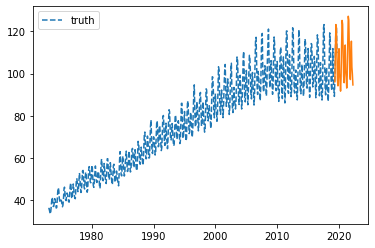

In [42]:
plt.plot(ts, '--', label='truth')
plt.plot(fcast, '-')

plt.legend();

In [43]:
#ARIMA Models
adfuller(ts)

(-1.7405933729832426,
 0.4103281604468688,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [44]:
adfuller(np.log(ts))

(-3.0018666788915938,
 0.03472044330065342,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2515.663511859698)

In [45]:
adfuller(ts.diff(1).dropna())

(-7.941665363981162,
 3.3013438021519147e-12,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2292.555416618966)

In [46]:
adfuller(ts.diff(3).dropna())

(-7.014995865992341,
 6.768596949423723e-10,
 19,
 538,
 {'1%': -3.442563336759378,
  '5%': -2.866927190004947,
  '10%': -2.5696391843672695},
 2293.3794689438832)

In [47]:
ln_ts = np.log(ts)

In [48]:
adfuller(ln_ts.diff(2).dropna())

(-6.989132095496436,
 7.827253762770937e-10,
 13,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 -2490.1783436919377)

In [49]:
Yt = ts
d=3

Yt = ln_ts
d=2

In [50]:
stationary_series = ln_ts.diff(2).dropna()

<AxesSubplot:xlabel='DATE'>

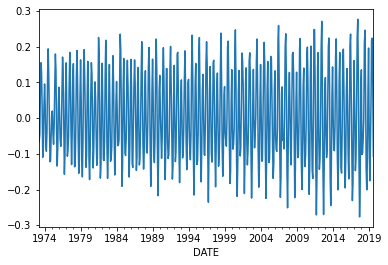

In [51]:
stationary_series.plot()

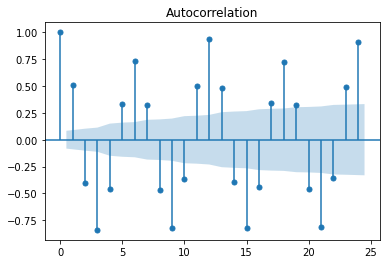

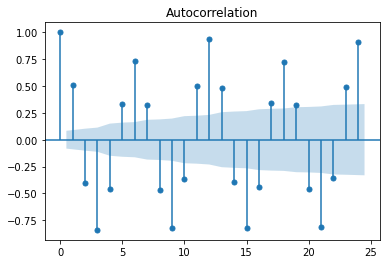

In [52]:
#Autocorrelation function
smt.graphics.plot_acf(stationary_series, lags=24)

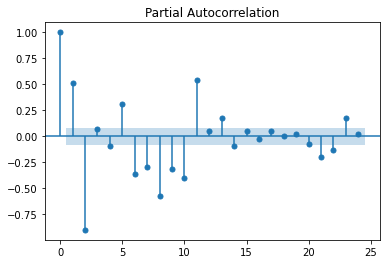

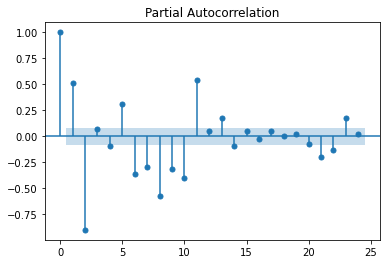

In [53]:
smt.graphics.plot_pacf(stationary_series, lags=24, method='ols')

In [55]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(ln_ts, order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\akhil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [56]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  561
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                1302.877
Date:                            Tue, 13 Jul 2021   AIC                          -2595.755
Time:                                    21:12:20   BIC                          -2574.251
Sample:                                01-01-1973   HQIC                         -2587.348
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1067      0.044     -2.420      0.016      -0.193      -0.020
ma.L1         -1.0000     16.146   

In [57]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

p=1   P=1     p = (0,1,2) q = (0,1,2), d=2, P=(0,1,2) D=(0,1,2), Q=(0,1,2)
d=2   D=0
q=1   Q=1

In [58]:
best_results = auto_arima(ln_ts,  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 3), D=range(0, 2), Q=range(0, 3))

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:-1238.511012334182
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:-1556.8995683958988
SARIMAX(0, 2, 0)x(0, 0, 2, 12)12 - AIC:-1641.3644945038018
SARIMAX(0, 2, 0)x(0, 1, 0, 12)12 - AIC:-1934.70974857202
SARIMAX(0, 2, 0)x(0, 1, 1, 12)12 - AIC:-2121.063845862031
SARIMAX(0, 2, 0)x(0, 1, 2, 12)12 - AIC:-2075.2625801710496
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:-1967.9124196110963
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:-2174.470996237147
SARIMAX(0, 2, 0)x(1, 0, 2, 12)12 - AIC:-2121.6305247580694
SARIMAX(0, 2, 0)x(1, 1, 0, 12)12 - AIC:-1982.0537672234154
SARIMAX(0, 2, 0)x(1, 1, 1, 12)12 - AIC:-2116.1111875432302
SARIMAX(0, 2, 0)x(1, 1, 2, 12)12 - AIC:-2075.004906256807
SARIMAX(0, 2, 0)x(2, 0, 0, 12)12 - AIC:-1989.6730801173028
SARIMAX(0, 2, 0)x(2, 0, 1, 12)12 - AIC:-2123.259471613008
SARIMAX(0, 2, 0)x(2, 0, 2, 12)12 - AIC:-2122.909156604178
SARIMAX(0, 2, 0)x(2, 1, 0, 12)12 - AIC:-2006.787282849531
SARIMAX(0, 2, 0)x(2, 1, 1, 12)12 - AIC:-2082.1612054404186
SARIMA

SARIMAX(2, 2, 1)x(2, 0, 2, 12)12 - AIC:-2564.641868361884
SARIMAX(2, 2, 1)x(2, 1, 0, 12)12 - AIC:-2447.343312170149
SARIMAX(2, 2, 1)x(2, 1, 1, 12)12 - AIC:-2514.3365978477523
SARIMAX(2, 2, 1)x(2, 1, 2, 12)12 - AIC:-2508.4606927807954
SARIMAX(2, 2, 2)x(0, 0, 0, 12)12 - AIC:-1960.4493550353902
SARIMAX(2, 2, 2)x(0, 0, 1, 12)12 - AIC:-2121.5730429727437
SARIMAX(2, 2, 2)x(0, 0, 2, 12)12 - AIC:-2131.5772131307594
SARIMAX(2, 2, 2)x(0, 1, 0, 12)12 - AIC:-2407.9132493212337
SARIMAX(2, 2, 2)x(0, 1, 1, 12)12 - AIC:-2544.514807376341
SARIMAX(2, 2, 2)x(0, 1, 2, 12)12 - AIC:-2490.6440499443192
SARIMAX(2, 2, 2)x(1, 0, 0, 12)12 - AIC:-2444.067856985337
SARIMAX(2, 2, 2)x(1, 0, 1, 12)12 - AIC:-2638.573162075185
SARIMAX(2, 2, 2)x(1, 0, 2, 12)12 - AIC:-2571.198411633012
SARIMAX(2, 2, 2)x(1, 1, 0, 12)12 - AIC:-2444.602722102262
SARIMAX(2, 2, 2)x(1, 1, 1, 12)12 - AIC:-2534.6209224533477
SARIMAX(2, 2, 2)x(1, 1, 2, 12)12 - AIC:-2487.954960157572
SARIMAX(2, 2, 2)x(2, 0, 0, 12)12 - AIC:-2461.6232249003147
SARIM

In [59]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(np.log(train), order = (1,2,1), seasonal_order= (1,0,1,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  556
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                1289.719
Date:                            Tue, 13 Jul 2021   AIC                          -2569.437
Time:                                    21:49:22   BIC                          -2547.979
Sample:                                01-01-1973   HQIC                         -2561.045
                                     - 04-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1081      0.044     -2.441      0.015      -0.195      -0.021
ma.L1         -1.0000     55.139   

In [60]:
pred_2019 = np.exp(model.predict(start='2019-01-01'))
pred_2019

2019-01-01    107.268019
2019-02-01    103.331510
2019-03-01     93.398981
2019-04-01     87.386984
Freq: MS, Name: predicted_mean, dtype: float64

In [62]:
actual_2019 =ts['2019-01-01':'2019-04-01']

In [63]:
actual_2019

DATE
2019-01-01    111.8520
2019-02-01     97.3261
2019-03-01     93.8406
2019-04-01     89.1873
Name: Electricty_Consumption_in_TW, dtype: float64

In [64]:
print('MAPE_2019', np.mean(np.abs(actual_2019 -pred_2019)/actual_2019))

MAPE_2019 0.03189459968725328


In [65]:
fcast_test = np.exp(model.forecast(steps=5))

In [66]:
test

DATE
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Electricty_Consumption_in_TW, dtype: float64

In [69]:
print('MAPE_test', np.mean(np.abs(test -fcast_test)/test))

MAPE_test 0.018741681741772615


In [70]:
fcast_36months = np.exp(model.forecast(steps=36))

In [71]:
fcast_36months

2019-05-01     94.665390
2019-06-01    109.457663
2019-07-01    120.887699
2019-08-01    119.929563
2019-09-01    106.861774
2019-10-01     94.414484
2019-11-01     92.173876
2019-12-01    102.315953
2020-01-01    108.475930
2020-02-01     99.411756
2020-03-01     94.896588
2020-04-01     88.731278
2020-05-01     94.378297
2020-06-01    109.225966
2020-07-01    120.720808
2020-08-01    119.741857
2020-09-01    106.578941
2020-10-01     94.055876
2020-11-01     91.794631
2020-12-01    101.972459
2021-01-01    108.152272
2021-02-01     99.031110
2021-03-01     94.485407
2021-04-01     88.286785
2021-05-01     93.943259
2021-06-01    108.843261
2021-07-01    120.384931
2021-08-01    119.386704
2021-09-01    106.146725
2021-10-01     93.565387
2021-11-01     91.286704
2021-12-01    101.485974
2022-01-01    107.676982
2022-02-01     98.511609
2022-03-01     93.941805
2022-04-01     87.718706
Freq: MS, Name: predicted_mean, dtype: float64

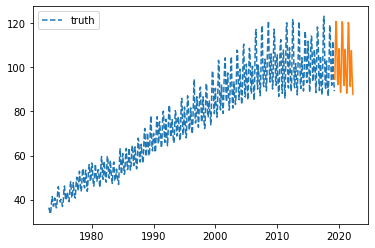

In [72]:
plt.plot(train, '--', label='truth')
plt.plot(fcast_36months, '-')

plt.legend();

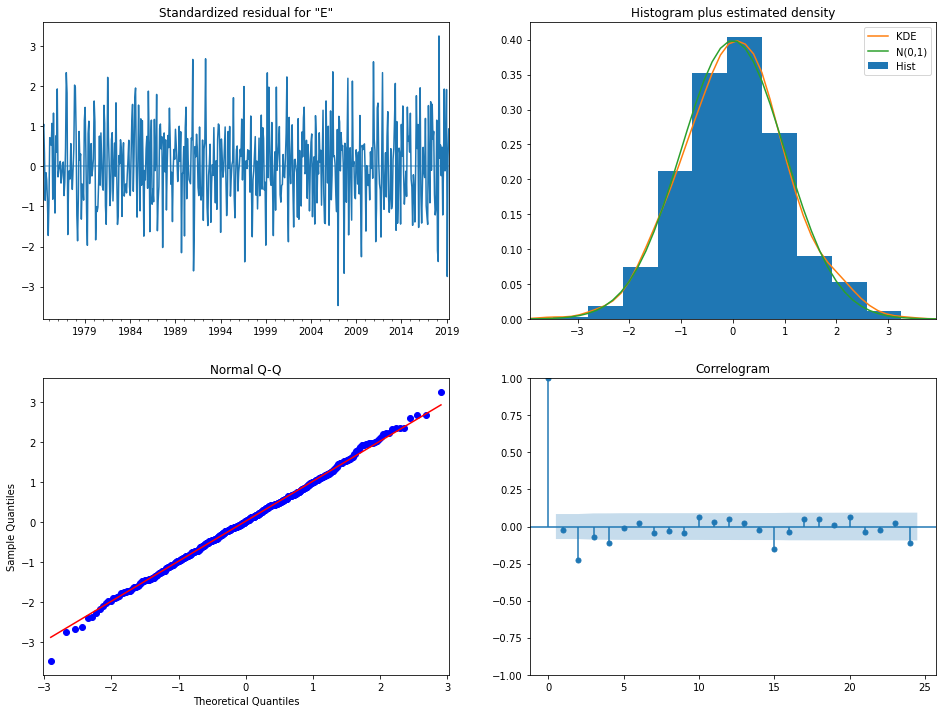

In [73]:
model.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()